In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import rawpy

array = np.load('IMG_9939.npy')
print('Loaded array of size', array.shape)
print('The pens, from top to bottom, are red, green and blue')

def read_raw(filename):
    return rawpy.imread(filename)

raw = []
raw_array = []
for i, filename in enumerate(['IMG_3044.CR3', 'IMG_3045.CR3', 'IMG_3046.CR3', 'IMG_3047.CR3', 'IMG_3048.CR3', 'IMG_3049.CR3']):
    raw.append(read_raw(filename))
    raw_array.append(raw[i].raw_image_visible)

# Initialize channels with zeros
Y_channel_mask = np.zeros_like(array)
C1_channel_mask = np.zeros_like(array)
C2_channel_mask = np.zeros_like(array)

# Populate Y channel positions with original values
Y_channel_mask[::2, ::2] = array[::2, ::2]  # top-left of each 2x2 block
Y_channel_mask[1::2, 1::2] = array[1::2, 1::2]  # bottom-right of each 2x2 block

# Populate C1 channel positions with original values
C1_channel_mask[::2, 1::2] = array[::2, 1::2]  # top-right of each 2x2 block

# Populate C2 channel positions with original values
C2_channel_mask[1::2, ::2] = array[1::2, ::2]  # bottom-left of each 2x2 block

# Populate Y channel positions with original values
Y_channel_mask[::2, ::2] = 1  # top-left of each 2x2 block
Y_channel_mask[1::2, 1::2] = 1  # bottom-right of each 2x2 block

# Populate C1 channel positions with original values
C1_channel_mask[::2, 1::2] = 1  # top-right of each 2x2 block

# Populate C2 channel positions with original values
C2_channel_mask[1::2, ::2] = 1 # bottom-left of each 2x2 block




Loaded array of size (4014, 6020)
The pens, from top to bottom, are red, green and blue


In [8]:
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

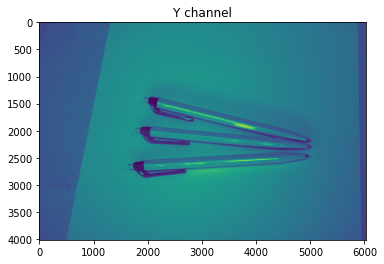

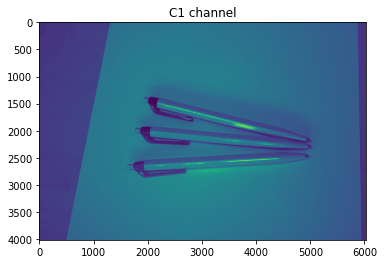

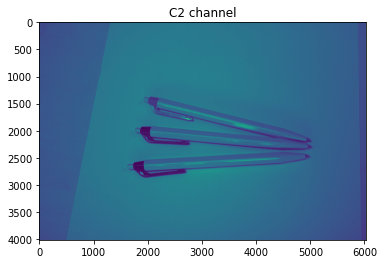

In [9]:
def demosaic_channel(X, M):
    MX = M * X
    numerator = convolve2d(MX, K, mode='same', boundary='wrap')
    denominator = convolve2d(M, K, mode='same', boundary='wrap')
    with np.errstate(divide='ignore', invalid='ignore'):
        C = numerator / denominator
        C[denominator == 0] = 0  # Safeguard for division by zero
    return C

K = np.ones((3, 3))

# Demosaic each channel
Y_demosaiced = demosaic_channel(array, Y_channel_mask)
C1_demosaiced = demosaic_channel(array, C1_channel_mask)
C2_demosaiced = demosaic_channel(array, C2_channel_mask)
show_image(Y_demosaiced, 'Y channel')
show_image(C1_demosaiced, 'C1 channel')
show_image(C2_demosaiced, 'C2 channel')


C2 is Red
C1 is Blue 
Y is Green

In [ ]:
print("Y Channel Mask:\n", Y_channel_mask)
print("C1 Channel Mask:\n", C1_channel_mask)
print("C2 Channel Mask:\n", C2_channel_mask)
plt.imshow(array)
plt.title('Original Image')
plt.show()
plt.imshow(Y_channel_mask, cmap='gist_heat')
plt.title('Y Channel Mask')
plt.show()
plt.imshow(C1_channel_mask, cmap='gist_heat')
plt.title('C1 Channel Mask')
plt.show()
plt.imshow(C2_channel_mask, cmap='gist_heat')
plt.title('C2 Channel Mask')
plt.show()

cropped_red = C1_channel_mask[1400:1500, 2000:2170]
plt.imshow(cropped_red, cmap='gray')
plt.title('C1 Channel Mask (Red Pen)')
plt.show()